## Text Similarity

[Reference Doc](https://www.kaggle.com/learn-guide/5-day-genai)

### Objective
The goal it to 
1. Generate Embeddings of text
2. Find similarity between texts

In [7]:
# imports
from google import genai
from google.genai import types
import pandas as pd
import seaborn as sns

from dotenv import load_dotenv

from IPython.display import Markdown

load_dotenv()
genai.__version__

'1.24.0'

In [2]:
client = genai.Client()

for model in client.models.list():
  if 'embedContent' in model.supported_actions:
    print(model.name)

models/embedding-001
models/text-embedding-004
models/gemini-embedding-exp-03-07
models/gemini-embedding-exp


### Calculate Similarity Scores

Here we would create different arrangements of the same text, spelling mistakes, different text altogether. Try to check similarity in vector space.

In [4]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]

In [5]:
response = client.models.embed_content(
    model='models/text-embedding-004',
    contents=texts,
    config=types.EmbedContentConfig(task_type='semantic_similarity'))

In [6]:
def truncate(t: str, limit: int = 50) -> str:
  """Truncate labels to fit on the chart."""
  if len(t) > limit:
    return t[:limit-3] + '...'
  else:
    return t


truncated_texts = [truncate(t) for t in texts]

<Axes: >

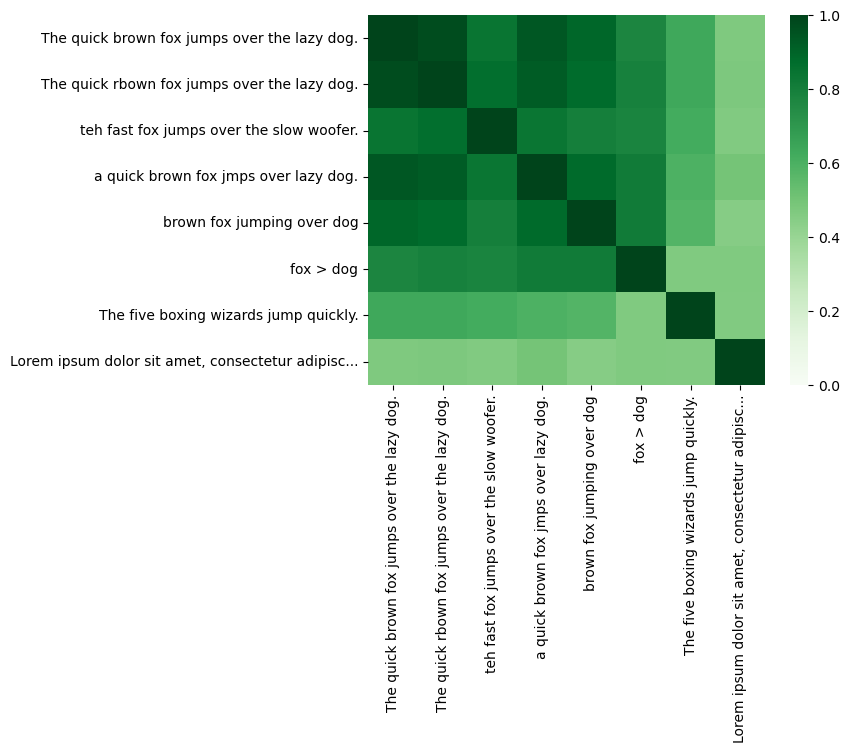

In [8]:
# Set up the embeddings in a dataframe.
df = pd.DataFrame([e.values for e in response.embeddings],
                  index=truncated_texts)

# Perform the similarity calculation
sim = df @ df.T
# Draw!
sns.heatmap(sim, vmin=0, vmax=1, cmap="Greens")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, The quick brown fox jumps over the lazy dog. to Lorem ipsum dolor sit amet, consectetur adipisc...
Columns: 768 entries, 0 to 767
dtypes: float64(768)
memory usage: 48.4+ KB


In [9]:
sim['The quick brown fox jumps over the lazy dog.'].sort_values(
    ascending=False)

The quick brown fox jumps over the lazy dog.          0.999999
The quick rbown fox jumps over the lazy dog.          0.975623
a quick brown fox jmps over lazy dog.                 0.939730
brown fox jumping over dog                            0.894507
teh fast fox jumps over the slow woofer.              0.842152
fox > dog                                             0.776455
The five boxing wizards jump quickly.                 0.635346
Lorem ipsum dolor sit amet, consectetur adipisc...    0.472174
Name: The quick brown fox jumps over the lazy dog., dtype: float64

Further explore these notebooks
1. https://github.com/google-gemini/cookbook/blob/main/examples/Search_reranking_using_embeddings.ipynb
2. https://github.com/google-gemini/cookbook/blob/main/examples/Anomaly_detection_with_embeddings.ipynb